# Laymanz Notebooks: Training your first deep learning model
Author: Ali Ahmad & Amrbose Ling

**Our goal is to get rid of abstractions and black boxes when learning about ML**

**What is this notebook about?**

In this notebook, we will go over some of the fundamental ideas behind deep learning, neural networks, model training, inference, backpropagation, loss functions, optimizers.

**What do I need to set up my environment?**

All of our notebooks will only use numpy, pytorch, matplotlib for visualizations. If you are very eager to learn about what PyTorch is and how it works, check out this super detailed notebook on PyTorch! If you are running this on colab you can just import the packages, if you are running this notebook locally , just remember to `pip install numpy torch matplotlib`. Check [here](https://pytorch.org/get-started/locally/) to see which torch version depending on the hardware you have.

**How is this notebook structured?**

Each notebook will have

[**How to use matplotlib for plotting**](https://colab.research.google.com/github/amanchadha/aman-ai/blob/master/matplotlib.ipynb#scrollTo=1-AcMM6NSmP-)


## Breakdown
*   What is deep learning?
*   What is a neuron? What is an activation?
*   What is a neural network?
*   What is a multi-layer perceptron?
*   What is a computation graph?
*   What is autograd?
*   What is a forward pass?
*   What is a loss function?
*   What is an optimizer?




In [13]:
import numpy as np
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader,Dataset
from tqdm import tqdm

# What is deep learning?

You can find many definitions online, but here is my definition:
Deep learning involves extracting meaningful insights from data using deep neural networks.
Deep learning is a branch of Machine Learning that specializes in the use of neural networks to make predictions.


# What can deep learning be used for?
* Classification
    - Binary classification
    - Multiclass classification
    - Multilabel classficiation
* Regression
    - Linear Regression
    - Logistic Regression
    - Polynomial Regression
* Generative
    - Next-token prediction (GPT)
    - Image / Video Generation

**Ambrose yapping**


Deep learning is about feeding a neural network a bunch of data, the neural network produces some 
output, we see how wrong they were compared to what we want, we tell it "hey you were wrong you gotta change how you think so you get it right next time!" then we change it, we repeat this until we iterate through all of our data.

# What is a neuron?
A neuron are nerve cells in our brains, responsible for transmitting electrical signals from one part of the brain to another. 

## Properties of neurons:
- They receive their signals via their dendrites
- They have snynapses that module the electrical signals it receives (between dendrites and axons)
- They fire an output signal only when the total strength of the input signal exceed a certain threshold

# What is a perceptron?

A perceptron is a mathematical model of a biological neuron. Hence we use mathematical operations to model the properties of a neuron.

## Properties of a perecptron?
- electrical signals are represented by numerical values (some vector)
- modulation is modelled by multiplying some weight value to the input signal / values
- we model the total strength of a signal by performing a weighted sum of the inputs 
- we apply an activation function or a step function to model the firing of the signal upon some threshold
- it is believed that neurons remain inactive until the net input to the cell body reaches a certain threshold

<center><img src="https://miro.medium.com/v2/resize:fit:2902/format:webp/1*hkYlTODpjJgo32DoCOWN5w.png" height=230 width=500/></center>
<center> On the left you have the biological neuron, on the right you have the artificial neuron </center>

### How do we represent a perceptron mathematically?

$$
y = \sigma ( \Sigma w_i x_i + b )
$$

where : 
* y: represents the output from the neuron
* w represents the weight associated with this neuron
* x: represents the input to the neuron
* b: represets the bias added to each 

Ambrose's intuition:
Think of each neuron having its own behaviour or its own state, it behaves differently from other neurosn which is why each
has a different weight and bias associated with it.


### How do we represent all these quantities mathematically?
Think of different ways you may want to represent inputs, and I can list some examples for some of the most common machine learning applications, all these are different modalities. Since we mentioned that the key to 
  

Lets try to develop an intuition for how you would quantitatively represent data?

1. Usecase: Predicting house prices 
Scenario: Lets say i want to predict the price of houses in Toronto given some information of a house(expensive af)
What does data look like:  For this scenario, I want to probably find some way to represent that information of a house **quantitatively**
What does input look like: Some collection of numbers that represent some characteristics of the home
What does output look like: A number (float/double) representating the price of the home
A house can be represented by:
    - int: how many bedrooms are in this house
    - int: how many square feet is this house
    - int: how many bathrooms it has
    - String: where is this house (the location)
    - String: the population of the city it is in

2.  Usecase: Predicting postiive and negative sentiment from text
Scenario: Lets say i want to predict if a tweet contains harmful or positive intent right, you know those goddamn politicans
What does data look like? In this scenario, the data would probably be the tweets themselves, which is a series of strings.


3. Usecase: Predicting the price of Bitcoin 
Scenario: Lets say i want to predict if the price of bitcoin. 
What does input look like: A collection of numbers representing past bitcon pries
The price of bitcoin can be represented by:
    - list of ints: 


4. Usecase: 

### Model Width VS Model Depth

**Larger width** (vertically, more neurons): usually means that the neural network has the capacity to remember more feature or encode more features in the weight connecitons or weight matrix. 
* With more neurons in each layer, you can capture more delicate details with more neurons. 
* Think of the more neurons you have in each layer, you have more processing units and internal states corresponding to each input unit. 
* Think of if you have 1 x 10 input, 15 neurons VS 1 x 10 input, 100 neurons, you have much more overall weight connections to the input, so you can capture each intricate value in the input more precisely with more weights.
* Think of F1 cars right when they get to the pit stop, if you have only 5 people changing the tires, wiping the windows, pumping gas VS when you have 20 people , you would be be able to be more precise about what you do to the car, 5 people would probably capture less of the tasks they need to do on the car. People (neurons), the car (input).

**Larger depth** (more layers), usually means that the neural network can remember or encode more complex,high dimensional features from the training data.

* The way i think could help also understand is that think of width as having more functions to model your data, but more functions do not necessarily mean that the functions are more complex. 
* Increasing the width is similar to going from 1 function: y = mx+b to 20  functions, 20 y = wx+b's. You may be able to capture specific changes in the input data better with more lines. But they are still linear functions and it would always be linear
* But with greater depth, you can chain non-linearities together as you apply activation functions and additional weights. So now think of 20 y = (wa(wa(wx+b)+b)+b), this entire function gets more and more complex and you introduce more non-linearity at each layer.
* So going from 20 y=wx+b's to 20 y = (wa(wa(wx+b)+b)+b) is what enables you to capture a much more complicated function that fits your training data.

### Rank
Rank refers to the number of dimensions a tensor has

- Rank 0:  referred as a **scalar**, 1 single value
- Rank 1:  referred as a **vector**, 1 list of values
- Rank 2:  referred as a **matrix**, 1 2d array of values
- Rank 3:  referred as a **3D tensor**, you can think of as a cube of numbers or a stack of a number of 2D matrices


### Shape 
Shape is an array of numbers representing the length of each dimension. 
You can understand this as the number of elements along each dimension

```python
x = np.array([[[1],[2]],[[3],[4]]])
```

**Ambrose yapping**

The way I like thinking about shapes is in terms of boxes.
Lets say the shape of tensor `x` is `(2,4,5)`. This means that there are 2 big boxes. Within those 2 big boxes, each of the 2 big boxes has 4 boxes in it
Then for each of the 4 boxes you then have 5 boxes in each one.

One very typical example tensor is with shape `(B,C,H,W)`, for instance `(8,3,100,100)`
You have 8 boxes, or that means 8 samples
Within each box or sample, you have 3 boxes: 1 box for each channel, then within each channel, you have essentially a grid of dimensions `(H x W)`.


**NOTE:**
When building your neural network in PyTorch (or any deep learning framework), it is very very useful to check the shapes of your tensors at different operations you execute. One of the most common errors is `Shape Mismatch Error` where you are trying to applying illegal operations on tensors because their shapes don't 


In [2]:

# 1D: Array
x = np.array([0.12,0.23,2.34])

# 2D: Matrix
x = np.array([[0.1232,0.3445,0.345532],[0.1232,0.3445,0.345532]])

# Why do we use matrices?
# There are many highly efficient linear algebra libraries (NumPY, PyTorch) that are optimized to perfrom matrix multiplications extremely fast
# Using matrices allows us to perform operations in PARALLEL much faster to doing sequential operations


# Matrix
x = np.array([[0,1,2,3,4],[2,3,5,67,5]])

# Tensor
x = np.array([[0,1,2,3,4],[2,3,5,67,5],[10,20,40,20,2]])

# A tensor is nothing but a bigger matrix, it is an array that carries numerical data or think of a tensor as a multi-dimensional array. 
# Usually matrices are  m x n, tensors can be m x n x c x p ...


### Why does neural network architecture matter?
When we talk about the neural network architecture, we are referring to the specific arrangement of neurons, the connections of neurons,layers. The specific architecture dictates the capabilities of the model, the specific data it is best suited for, the features it would excel at capturing, the specific tasks it is suited for.

**Ambrose Yapping**

**So how do you choose the right neural network architecture?**

From what I know, it is almost the best to follow what somebody has done before. Reinventing the wheel is almost never a good idea unless your approach is to purely experiment with the architecture. If you are looking to accomplishing a task in ML, ask yourself if you even really need ML to do it. And 

From my experience, a lot of things seem to work theoretically, but almost never practically. So choose your experiments wisely. 

For example, `YoLo` architecutre has been experimentally shown to perform well in object detection. So if you want to train a ML model to detect pedestrains or cars, chances are using that architecture is a good idea VS putting together your own.

Another example (or this is based on my observation), in the diffusion model literature. A lot of works are based on Stable Diffusion, a method that uses a convolution-based neural network to generate images. It is actually very rare for people to change the architecture drastically. A lot of later works that aimed to improve the generation quality of diffusion models did not change much of the architecutre. It is almost always a safe bet to build on top of other's successful models or experiments.

### What is PyTorch?

PyTorch is a neural network library that lets you build and trian neural networks with their very comprehensive collection of APIs.

1. **Tensor Operations**: Basic operations for creating, manipulating, and transforming tensors.
2. **Mathematical Operations**: Functions for performing arithmetic, linear algebra, and complex mathematical computations.
3. **Neural Network Operations**: Layers, activation functions, loss functions, and other building blocks for constructing neural networks.
4. **Data Manipulation**: Functions for data loading, preprocessing, and augmentation.
5. **Optimization**: Algorithms for updating model parameters, such as SGD, Adam, etc.
6. **Autograd**: Operators supporting automatic differentiation.




### Tensor Operations

In [3]:
## -- Tensor Creation --
import torch

# Create a tensor from a list
a = torch.tensor([1, 2, 3, 4])
print(a)

# Create a tensor with random values
b = torch.rand(3, 3)
print(b)

# Create a tensor of zeros
c = torch.zeros(2, 2)
print(c)

# Create a tensor of ones
d = torch.ones(2, 3)
print(d)


tensor([1, 2, 3, 4])
tensor([[0.5387, 0.2830, 0.5071],
        [0.9525, 0.6684, 0.2839],
        [0.4818, 0.3317, 0.2035]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [4]:
## -- Arithmetic Operations --

x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])

# Addition
z = x + y
print(z)  # tensor([5, 7, 9])

# Subtraction
z = x - y
print(z)  # tensor([-3, -3, -3])

# Multiplication
z = x * y
print(z)  # tensor([4, 10, 18])

# Division
z = x / y
print(z)  # tensor([0.2500, 0.4000, 0.5000])


tensor([5, 7, 9])
tensor([-3, -3, -3])
tensor([ 4, 10, 18])
tensor([0.2500, 0.4000, 0.5000])


In [5]:
## -- Matrix Multiplication Operations --

a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# Matrix multiplication
c = torch.mm(a, b)
print(c)  # tensor([[19, 22], [43, 50]])
#NOTE: the shape of the resulting tensor is m x n if a is of shape ( m x a ), b is of shape ( a x n) 


tensor([[19, 22],
        [43, 50]])


In [6]:
## -- Element-wise operations --

a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# Element-wise multiplication
c = a * b
print(c)  # tensor([[ 5, 12], [21, 32]])

# Element-wise exponentiation
d = a ** 2
print(d)  # tensor([[ 1,  4], [ 9, 16]])


tensor([[ 5, 12],
        [21, 32]])
tensor([[ 1,  4],
        [ 9, 16]])


In [7]:
## -- Reduce Operations -- 
a = torch.tensor([1, 2, 3, 4])

# Sum
sum_a = torch.sum(a)
print(sum_a)  # tensor(10)

# Mean
mean_a = torch.mean(a.float())
print(mean_a)  # tensor(2.5)

# Max
max_a = torch.max(a)
print(max_a)  # tensor(4)

# Min
min_a = torch.min(a)
print(min_a)  # tensor(1)

#NOTE: these operations also change the dimension of the tensor, notice we go from [N] to [1]

tensor(10)
tensor(2.5000)
tensor(4)
tensor(1)


In [8]:
## -- Indexing and Slicing -- 

a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Select the first row
row = a[0, :]
print(row)  # tensor([1, 2, 3])

# Select the first column
col = a[:, 0]
print(col)  # tensor([1, 4, 7])

# Select a submatrix
submatrix = a[0:2, 1:3]
print(submatrix)
# tensor([[2, 3],
#         [5, 6]])


tensor([1, 2, 3])
tensor([1, 4, 7])
tensor([[2, 3],
        [5, 6]])


### Neural Network operations

In [12]:
# Layer operations
in_features = 10
out_features = 5

# Linear layers(Fully connected layers)
x = torch.tensor([1,2,3,4,5,6,7,8,9,10],dtype=torch.float32)
layer = nn.Linear(in_features,out_features)
output_tensor = layer(x)
print(output_tensor)
print(layer.weight.data)
print(layer.bias.data)
#NOTE: usually the last dimension is the feature dimension


# Convolutional layers (Conv1d, Conv2d, Conv3d)
# Conv 1d
# shape: (batch size, number of channels, sequence length of the input sequence)
x = torch.randn(1,3,10) # Create a input signal with sequence length 10 and a channel depth of 3 
in_channels = 3
out_channels = 20
kernel_size = 3
stride = 1
padding = 0
layer = nn.Conv1d(in_channels,out_channels,kernel_size,stride,padding)
#See the output tensor and its shape
output_tensor = layer(x)
print(output_tensor)
print(output_tensor.shape)
print(layer.weight.data)
print(layer.weight.data.shape)
print(layer.bias.data.shape)
#NOTE: PyTorch convolutions take in input where the channel dimension is in the middle
#Check out this notebook for more info on convolutions and how they work

#Conv 2d
# shape: (batch size, number of channels, height of input signal, width of input signal)
x = torch.randn(1,3,32,32) # Create a input signal with sequence length 10 and a channel depth of 3 
in_channels = 3
out_channels = 12
kernel_size = (3,3)
stride = 1
padding = 0
layer = nn.Conv2d(in_channels,out_channels,kernel_size,stride,padding)
output_tensor = layer(x)
print(output_tensor)
print(output_tensor.shape)
print(layer.weight.data)
print(layer.weight.data.shape)
print(layer.bias.data.shape)

tensor([ 5.6566,  2.2045, -4.0038, -8.8806, -4.4412], grad_fn=<ViewBackward0>)
tensor([[ 0.2247, -0.1937,  0.1102,  0.1122, -0.2476,  0.2613,  0.1783, -0.2574,
          0.2661,  0.2910],
        [ 0.0687,  0.1771, -0.1070,  0.2942,  0.0142, -0.0786,  0.0120,  0.2393,
         -0.0371, -0.0315],
        [ 0.2894, -0.3155,  0.2887, -0.1632, -0.1273, -0.2657,  0.0326, -0.1205,
          0.1410, -0.1886],
        [-0.2306,  0.0667, -0.0109, -0.1910,  0.1297,  0.1759, -0.2175, -0.2968,
         -0.3054, -0.3088],
        [ 0.1541, -0.2164, -0.2813,  0.2545,  0.0256, -0.2343,  0.0421, -0.0850,
          0.0504, -0.2954]])
tensor([ 0.2173, -0.0241, -0.2926,  0.0431, -0.1737])
tensor([[[-0.0373,  0.9377,  1.4127,  0.6872, -0.6168,  1.1203,  0.5345,
          -1.3682],
         [ 0.5366, -0.4932,  0.1191,  0.6544,  0.6114, -1.0175, -0.5298,
           0.4790],
         [-0.5222,  0.8440, -0.4290, -0.1199, -0.8134,  1.6066, -1.0080,
          -0.7929],
         [ 0.3540, -0.5653, -0.9322, -0.09

In [14]:
# Normalization operations

# NLP example
x = torch.randn(1,16,32,32)  #(batch size = 1, num of channels = 16, height = 32, width = 32)

# Batch Normalization:  computes a mean and variance FOR EACH FEATURE (each channel)
num_features = 16
normalization = nn.BatchNorm2d(num_features)
output_tensor = normalization(x)

# Layer Normalization: compute a mean and variance FOR EACH SAMPLE ()
num_features = 16
normalization = nn.LayerNorm(num_features)
output_tensor = normalization(x)


# NLP example
x = torch.randn(1,16,100) #(batch size = 1, num of channels = 16, sequence length = 100)

# Batch Normalization:  computes a mean and variance FOR EACH FEATURE (each channel)
num_features = 16
normalization = nn.BatchNorm1d(num_features)
output_tensor = normalization(x)


# Layer Normalization: compute a mean and variance FOR EACH SAMPLE
num_features = 16
normalization = nn.LayerNorm(num_features)
output_tensor = normalization(x)

RuntimeError: Given normalized_shape=[16], expected input with shape [*, 16], but got input of size[1, 16, 32, 32]

In [ ]:
# Activation Functions

x = torch.randn(1,10)

# ReLU: f(x)  = x if x >0 else 0 
activation_function = nn.ReLU()
output_tensor = activation_function(x)

# Sigmoid: f(x) = 1 / (1 + e^-x)
activation_function = nn.Sigmoid()
output_tensor = activation_function(x)

# Tanh: f(x)  = tanh(x)
activation_function = nn.Sigmoid()
output_tensor = activation_function(x)

In [ ]:
# Loss functions
# these functions measure how well the output values match the ground truth values

y = torch.randn(1,3,10)
y_pred = torch.randn(1,3,10)

# MSE (Mean Squared Error) Loss: loss = (y - y_pred)^2
loss_function = nn.MSELoss()
loss = loss_function(y_pred,y)

# Cross Entropy Loss
loss_function = nn.CrossEntropyLoss()
loss = loss_function(y_pred,y)

# Binary Cross Entropy Loss
loss_function = nn.BCELoss()
loss = loss_function(y_pred,y)


# KL Divergence Loss
loss_function = nn.KLDivLoss()
# if not log_target: # default
#     loss_pointwise = target * (target.log() - input)
# else:
#     loss_pointwise = target.exp() * (target - input)

loss = loss_function(y_pred,y)


In [ ]:
# Optimizer Algorithms
# 

##  How do you train a neural network to do something you want?

* Data Preparation & Preprocessing
    * Step 1: Find a bunch of data for the thing you want to train your model on
    * Step 2: Preprocess the data to turn it into the right form

* Model training
    * Step 1: Pass data to the model (forward pass) to get model output
    * Step 2: Compute the loss between data and model output
    * Step 3: Perform backpropagation (backward pass)
    * Step 4: Perform gradient descent and weight updates

* Model Evaluation
    * Step 1: Evaluate it to assess its performance
    * Step 2: Assess its performance on test data



In this notebook we will put more emphasis on model training, 
The most common training loop you will ever see:
```python 
for epoch in range(num_epochs):
    for batch in training_data:
        output = model(batch.x) # -(1)
        loss = loss_fn(batch.y,output) # -(2)
        loss.backward() # -(3)
        optimizer.step() # -(4)
        optimizer.zero_grad()
```

**Ambrose Yapping**


`Epoch` refers to how many times you go through your entire training data. Sometimes people use `training_steps` in different settings and depneding on the training task. For example, in diffusion model training, you may not need to go through the entire training dataset multiple times. So I can say `training_steps = 100`, meaning I want my model to perform weight updates 100 times (100 batches of data processed by the model)

# Preparing your data (Data perspective)
* Depending on the data you have, you have different ways to **preprocess** your data
* Some of the most common modalities out there are text, images, audio.

# Preparing your data (PyTorch perspective)
* In PyTorch, a `Dataset` object is a class that allows you to access samples of your data. This class also allows you to perform certain data transformations to process the raw samples you grab from your dataset
* In case you dont know, a **sample** just means 1 pair of input and output. So for a image classification task, a sample may be (x: image,y: label), in text sentiment analysis, sample may be (x: string of text,y: float probability).

* Lets say you have a dataset called `MyDataset`,it inherits the `Dataset` class. It represents a collection of data samples. 
    ```python
    # 
    class MyDataset(Dataset):
        ...
        def __getitem__(self,index):
            return

    ```
    - What this class lets you do is that you can specify the logic for accessing 1 sample
    - So when you do `dataset[0]` calls `__getitem__()` and a sample of data will be returned
    - you can also apply transformations that would be applied to all the samples in your dataset when you fetch them
        - inside `__getitem__()`, you can apply transformations to the input and output by doing `x = self.transform(x)` and `y = self.target_transform(y)`.
        - **When will I do this?**, some common usecases
            - Transforms:
                - Images: cropping, resizing, normalization
                - Text: tokenization (turning words into numbers), padding and truncation
                - Audio: resampling, normalization, augmentation
            - Target Transform:
                - one hot encoding
                - encoding labels
                - normalization (coordinates)
                - format conversions
        - NOTE: the most common application of transformations is on image modalities, for text we have designated components that specifically do preprocessing (tokenizer) 
* You can also define specific ways you want to grab samples from the dataset through the use of a sampler or `Sampler` class, which intuitively dictates how you sample data from your dataset.
    ```python
    class MySampler(Sampler):
        ...
        def __iter__(self):
            for i in range(self.N):
                yield i 
    ```
    - it is used to specify the dataloading order, and specifies the indexes
    - more specifically it is an iterable dataset
* As for a `DataLoader`, this object is the intermediate process that prepares the data we take from the data into batches.
    ```python
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
    ```
    - the DataLoader receives the `dataset` object as input and returns the dataloader 
### How they all work together:
<center>
<a href="https://ibb.co/ZMgcwc4"><img src="https://i.ibb.co/W2zBdB8/Screenshot-2024-05-30-023025.png" alt="Screenshot-2024-05-30-023025" border="0"></a></center>

* 1. the dataset class allows you to index into different samples in your dataset
* 2. your CPU has different workers that grab the samples responsible for constructing a batch
* 3. the CPU workers load the queried samples into a queue. 
* 4. the sampler class also provides which indices do we need for 
* 4. the dataloader performs the collating procedure, which draws samples in the queue and puts them into a batch

In [ ]:
# Here is an example of a collating function

def collate_fn(samples):
    return batch

# As input, the collate function takes the raw batch_size number of samples
# It then performs some processing or you can define some custom logic
# to turn these samples into tensors

In [8]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader,Dataset
import torch.nn.functional as F
from torchvision.transforms import v2
from torchvision.transforms import functional as TF 
from tqdm import tqdm
# Load the MNIST dataset
transform = v2.Compose([v2.ToTensor(), v2.Normalize((0.1307,), (0.3081,))])



# Create a train dataloader for the dataset
train_dataset = MNIST('',train=True,download=True,transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)


# Create a test dataloader for the dataset
test_dataset = MNIST('',train=True,download=True,transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True)



# What is happening here?
# Just like what we described before, the dataloader helps us fetch batches of data to be fed to our model
# We create an iterator with the iter() method, that allows us to iterate through the elements of the dataloader
# When we do :
# for batch in dataloader:
#   ...
# We create an iterator and executes the next() method to move onto the next batch after each iteration of the loop
print(next(iter(train_dataloader))) #each batch is a list
print(next(iter(train_dataloader))[0]) # at position 0, we have the x (or images)
print(next(iter(train_dataloader))[0].shape) # When you look at the shape, 
print(next(iter(train_dataloader))[1].shape) # at position 1, we have the y (or labels)
print(type(next(iter(train_dataloader))))


[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.42

/home/tiny_ling/anaconda3/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [9]:
# Lets see the dataset sample
# Each sample is a tuple (remeber it is a pair of x and y)
# THis is the x (image x)
print(train_dataset[10][0])

# This is the label for the corresponding 
print(train_dataset[10][1])


tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

In [10]:
# Lets see what is the shape of the sample
print(train_dataset[10][0].shape)
# This is the shape of the image

print(train_dataset[10][1])
# This is the label

torch.Size([1, 28, 28])
3


**Ambrose Yapping**
- **Parameters VS Hyperparameters**
    - **Hyperparameters**: refer to the numbers you can physically change when you train your model, configutations or settings you can explicity set. There are hyperparameters that are specific to the **training process** and some specific to the **deep learning model**. 
    - Each hyperparameter has its own role in training. Altering either sets of these hyperparameters can greatly change the performance and output of the model
    - Here are some examples of training hyperparameters:
        - Learning rate
        - Batch size
        - Gradient accumulation steps
        - 
    - Here are some examples of model hyperparameters:
        - Number of neurons
        - Number of feature dimensions
        - Number of layers
        - Number of channels
    - **Parameters**: refer to the numbers you cannot physically go change when you train your model. This refers to the weights and biases of each weight matrix inside your model. These are only influenced by the loss value that is computed.

    

# Train MNIST with our own neural network engine

# Creating our very own neural network engine

Somtimes it may be confusing to understand what happens under the hood when you train a neural network in PyTorch. Just like Andrej Karpathy's video on backpropagation, I would like to extend it and give more intuition as to what happens when you train a neural network. 
    

# Creating our own Multi-Layer Perceptron

In [11]:
class MLP(nn.Module):
    def __init__(self, hidden_size_1=100, hidden_size_2=100):
        super(MLP,self).__init__()
        self.linear1 = nn.Linear(28*28, hidden_size_1) 
        self.linear2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.linear3 = nn.Linear(hidden_size_2, 10)
        self.relu = nn.ReLU()

    def forward(self, img):
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return x


# Train MNIST using PyTorch

In [12]:
def train(train_loader, net, epochs=5, total_iterations_limit=None):
    cross_el = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

    total_iterations = 0

    for epoch in range(epochs):
        net.train()

        loss_sum = 0
        num_iterations = 0

        data_iterator = tqdm(train_loader, desc=f'Epoch {epoch+1}')
        if total_iterations_limit is not None:
            data_iterator.total = total_iterations_limit
        for data in data_iterator:
            num_iterations += 1
            total_iterations += 1
            x, y = data
            x = x.to("cuda")
            y = y.to("cuda")
            optimizer.zero_grad()
            output = net(x.view(-1, 28*28))
            loss = cross_el(output, y)
            loss_sum += loss.item()
            avg_loss = loss_sum / num_iterations
            data_iterator.set_postfix(loss=avg_loss)
            loss.backward()
            optimizer.step()

            if total_iterations_limit is not None and total_iterations >= total_iterations_limit:
                return
            
def print_size_of_model(model):
    torch.save(model.state_dict(), "temp_delme.p")
    print('Size (KB):', os.path.getsize("temp_delme.p")/1e3)
    os.remove('temp_delme.p')


In [13]:
# Lets instantiate our model
model = MLP().to("cuda")

In [14]:
train(train_dataloader,model)

Epoch 5: 100%|██████████| 938/938 [00:05<00:00, 160.36it/s, loss=0.0497]


In [15]:
torch.save(model.state_dict(),"mnnist.pt")

In [16]:
def test(model: nn.Module, total_iterations: int = None):
    correct = 0
    total = 0

    iterations = 0

    model.eval()
    model.to("cuda")

    with torch.no_grad():
        for data in tqdm(test_loader, desc='Testing'):
            x, y = data
            x = x.to("cuda")
            y = y.to("cuda")
            output = model(x.view(-1, 784))
            for idx, i in enumerate(output):
                if torch.argmax(i) == y[idx]:
                    correct +=1
                total +=1
            iterations += 1
            if total_iterations is not None and iterations >= total_iterations:
                break
    print(f'Accuracy: {round(correct/total, 3)}')

In [17]:
test(model)

Testing: 100%|██████████| 6000/6000 [00:12<00:00, 497.02it/s]

Accuracy: 0.983


# Visualizing the loss landscape

In [18]:
# Extract model weights
weights = []
# We iterate through all the parameters of the model
for param in model.parameters():
    weights.append(param.data.view(-1).cpu().numpy())

# You get one big array that stores all the parameters of our model
weights = np.concatenate(weights)


In [46]:
weights.shape

# Do a sanity check for why is it size 89610
#           weights    bias   param for that layer
# Layer 1: 784 * 100 + 100 =  78500
# Layer 2: 100 * 100 + 100 =  10100
# Layer 3: 100 * 10 + 10   =  1010

# Add them all up:
# 78500 + 10100 + 1010 = 89610

(89610,)

In [19]:
# Define grid points for visualization in 3D
grid_resolution = 20
x_min, x_max = weights.min(), weights.max()
y_min, y_max = weights.min(), weights.max()
z_min, z_max = weights.min(), weights.max()
xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, grid_resolution),
                         np.linspace(y_min, y_max, grid_resolution),
                         np.linspace(z_min, z_max, grid_resolution))


### What is this doing?

In [26]:
param_vectors = []

# Collect parameter vectors at different points
for epoch in range(5):
    # Simulate training and collect parameter vectors
    model.train()
    for batch in train_dataloader:
        # Forward pass (dummy code)
        data, target = batch
        output = model(data)
        loss = F.cross_entropy(output, target)

        # Collect parameter vector
        param_vector = []
        for param in model.parameters():
            param_vector.append(param.data.view(-1).cpu().numpy())
        param_vector = np.concatenate(param_vector)
        param_vectors.append(param_vector)
        
param_vectors = np.array(param_vectors)

from sklearn.decomposition import PCA

# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
param_vectors_3d = pca.fit_transform(param_vectors)


In [27]:
# Create a grid in the PCA space
grid_resolution = 20
x_min, x_max = param_vectors_3d[:, 0].min(), param_vectors_3d[:, 0].max()
y_min, y_max = param_vectors_3d[:, 1].min(), param_vectors_3d[:, 1].max()
z_min, z_max = param_vectors_3d[:, 2].min(), param_vectors_3d[:, 2].max()
xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, grid_resolution),
                         np.linspace(y_min, y_max, grid_resolution),
                         np.linspace(z_min, z_max, grid_resolution))


 i: 0, j: 0, k: 0
 i: 0, j: 0, k: 1
 i: 0, j: 0, k: 2
 i: 0, j: 0, k: 3
 i: 0, j: 0, k: 4
 i: 0, j: 0, k: 5
 i: 0, j: 0, k: 6
 i: 0, j: 0, k: 7
 i: 0, j: 0, k: 8
 i: 0, j: 0, k: 9
 i: 0, j: 0, k: 10
 i: 0, j: 0, k: 11
 i: 0, j: 0, k: 12
 i: 0, j: 0, k: 13
 i: 0, j: 0, k: 14
 i: 0, j: 0, k: 15
 i: 0, j: 0, k: 16
 i: 0, j: 0, k: 17
 i: 0, j: 0, k: 18
 i: 0, j: 0, k: 19
 i: 0, j: 1, k: 0
 i: 0, j: 1, k: 1
 i: 0, j: 1, k: 2
 i: 0, j: 1, k: 3
 i: 0, j: 1, k: 4
 i: 0, j: 1, k: 5
 i: 0, j: 1, k: 6
 i: 0, j: 1, k: 7
 i: 0, j: 1, k: 8
 i: 0, j: 1, k: 9
 i: 0, j: 1, k: 10
 i: 0, j: 1, k: 11
 i: 0, j: 1, k: 12
 i: 0, j: 1, k: 13
 i: 0, j: 1, k: 14
 i: 0, j: 1, k: 15
 i: 0, j: 1, k: 16
 i: 0, j: 1, k: 17
 i: 0, j: 1, k: 18
 i: 0, j: 1, k: 19
 i: 0, j: 2, k: 0
 i: 0, j: 2, k: 1
 i: 0, j: 2, k: 2
 i: 0, j: 2, k: 3
 i: 0, j: 2, k: 4
 i: 0, j: 2, k: 5
 i: 0, j: 2, k: 6
 i: 0, j: 2, k: 7
 i: 0, j: 2, k: 8
 i: 0, j: 2, k: 9
 i: 0, j: 2, k: 10
 i: 0, j: 2, k: 11
 i: 0, j: 2, k: 12
 i: 0, j: 2, k: 13
 i: 

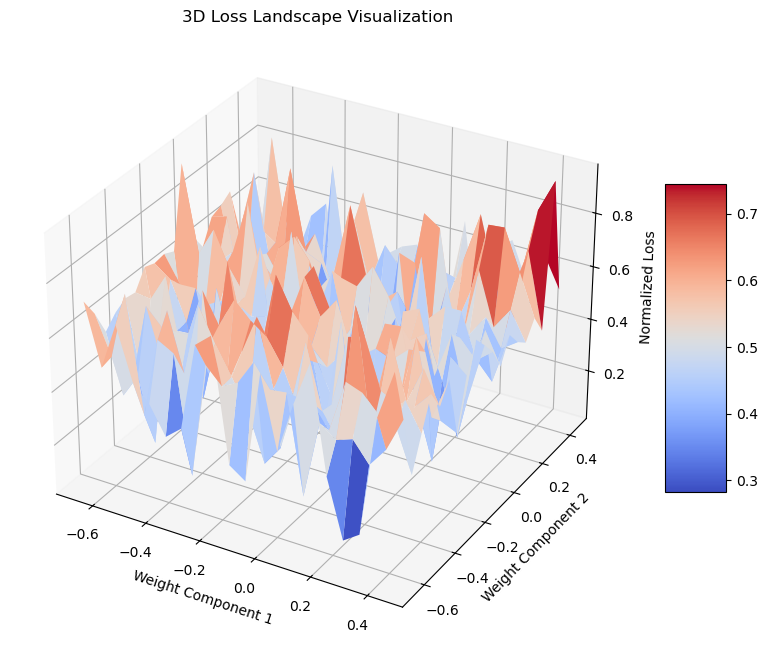

In [20]:
loss_values = np.zeros((grid_resolution, grid_resolution, grid_resolution))
model.eval().cpu()

with torch.no_grad():
    for i in range(grid_resolution):
        for j in range(grid_resolution):
            for k in range(grid_resolution):
                # Map grid point to original parameter space
                grid_point = np.array([xx[i, j, k], yy[i, j, k], zz[i, j, k]])
                param_vector_mapped = pca.inverse_transform(grid_point)

                idx = 0
                for param in model.parameters():
                    num_params = param.data.view(-1).size(0)
                    param.data.view(-1).copy_(torch.tensor(param_vector_mapped[idx:idx + num_params]))
                    idx += num_params

                # Evaluate loss on a batch of data
                total_loss = 0
                for data, target in train_dataloader:
                    output = model(data)
                    loss = F.cross_entropy(output, target, reduction='sum').item()
                    total_loss += loss

                loss_values[i, j, k] = total_loss / len(train_dataloader.dataset)


In [ ]:
# Plot the loss landscape in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Normalize the loss values for better visualization
norm_loss_values = (loss_values - np.min(loss_values)) / (np.max(loss_values) - np.min(loss_values))

# Plot the surface
surf = ax.scatter(xx.flatten(), yy.flatten(), zz.flatten(), c=norm_loss_values.flatten(), cmap=plt.cm.coolwarm)
fig.colorbar(surf, label='Normalized Loss')

ax.set_title('3D Loss Landscape Visualization')
ax.set_xlabel('Weight Component 1')
ax.set_ylabel('Weight Component 2')
ax.set_zlabel('Bias Component')